In [26]:
import numpy as np
import pandas as pd
import os
import json

np.set_printoptions(linewidth=320)

pd.set_option('display.max_columns',10)
from urllib.request import urlopen, Request

# kadoCleanFile = Request('https://romainpiot.fr/bigdata/KaDo_clean.csv', headers={'User-Agent': 'Mozilla/5.0'})
# kadoContent = urlopen(kadoCleanFile)
# data = pd.read_csv(kadoContent)

print ('Loading...')

data = pd.read_csv("./data/KaDo_clean.csv")

print ('Data Loaded.'
       'Now creating list...')

maille = data.sort_values(by=['FAMILLE', 'UNIVERS', 'MAILLE'], ascending=[True, True, True])
maille = maille.drop_duplicates(subset=['MAILLE'])
mlen = len(maille)
idList = [i+1 for i in range(mlen)]
maille['PRODUCT_ID'] = idList
maille = maille[['MAILLE','PRODUCT_ID']]

user = data.sort_values(by=['CLI_ID'], ascending=[True])
user = user.drop_duplicates(subset=['CLI_ID'])
newLen = len(user)
userIdList = [i+1 for i in range(newLen)]
users = np.unique(userIdList)
user['USER_ID'] = userIdList
user = user[['USER_ID', 'CLI_ID']]

print ('List created.'
       'Now creating Array...')

test = []

dataLen = len(data)

for i in range(20000):
       tmp = (maille[maille['MAILLE'] == (data.iloc[i]['MAILLE'])])
       tmp_m = tmp.iloc[0]['PRODUCT_ID']
       tmp2 = (user[user['CLI_ID'] == (data.iloc[i]['CLI_ID'])])
       tmp_u = tmp2.iloc[0]['USER_ID']
       tmp_list = [tmp_u, tmp_m]
       test.append(tmp_list)
print(test)

List created.Now creating Array...
[[1, 28], [1, 32], [2, 21], [2, 21], [2, 21], [2, 23], [2, 23], [3, 11], [4, 28], [5, 11], [5, 11], [5, 14], [6, 16], [6, 16], [6, 16], [6, 21], [6, 21], [6, 21], [6, 25], [6, 26], [6, 27], [6, 29], [6, 29], [7, 3], [8, 12], [8, 19], [8, 21], [9, 11], [9, 26], [10, 21], [10, 21], [10, 21], [10, 21], [11, 16], [11, 16], [12, 9], [12, 9], [12, 13], [13, 4], [13, 16], [13, 16], [13, 17], [13, 16], [13, 15], [13, 21], [13, 21], [13, 21], [13, 33], [13, 33], [14, 26], [14, 27], [14, 28], [14, 28], [14, 28], [15, 3], [16, 14], [16, 14], [16, 14], [16, 26], [16, 24], [16, 24], [16, 34], [17, 21], [18, 7], [18, 19], [19, 13], [19, 16], [19, 15], [19, 21], [19, 21], [19, 21], [19, 23], [19, 26], [19, 23], [19, 24], [19, 24], [19, 23], [19, 28], [19, 32], [19, 32], [19, 32], [20, 5], [20, 27], [20, 27], [20, 27], [20, 27], [21, 2], [21, 5], [21, 13], [22, 13], [22, 13], [22, 20], [22, 19], [22, 21], [22, 21], [22, 28], [23, 24], [24, 11], [24, 11], [24, 14], [2

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [28]:
X = np.array(test)

In [29]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

sse = calculate_WSS(X, 20)

print (sse)

[13504009476.415693, 3500083296.7130723, 1584148047.1614723, 926220266.9424767, 571305977.648648, 407712012.3295466, 293378271.22594976, 225417810.77722389, 178991855.39975512, 149787733.5113979, 121937848.36002785, 101176921.43981893, 87512479.72554332, 76436038.83628826, 66576918.31206849, 58613592.21260374, 52203917.77606969, 46084268.50033576, 42136593.93366013, 36796014.75805494]
[13504009476.415693, 3500073444.029161, 1584622608.8779247, 926236151.8946013, 571498114.6833494, 407756106.52124214, 293282396.761866, 225176897.4472187, 178969354.71882996, 149055505.08710593, 122505775.30016842, 101587198.96012384, 87952930.80352086, 76147345.74726847, 67267838.34829928, 57249945.80832547, 51049876.20712921, 46425418.21913415, 41301077.73352878, 36968647.78943741]


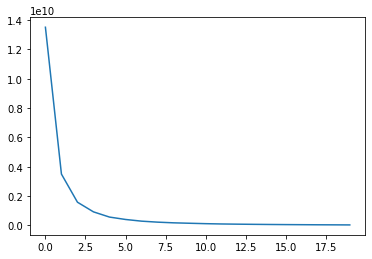

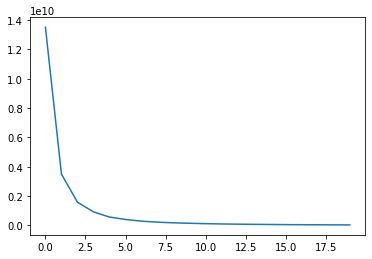

In [30]:
plt.plot(sse)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

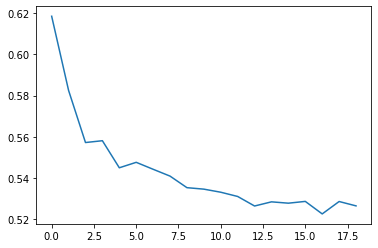

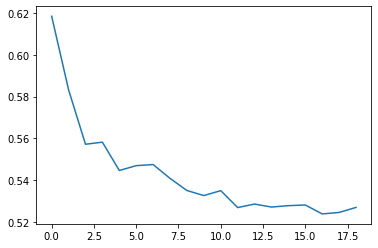

In [32]:
plt.plot(sil)
plt.show()

[[2682.27722506   22.2352783 ]
 [ 356.15888104   21.519283  ]
 [1555.02471483   21.79111217]
 [2127.39333502   22.18151982]
 [ 946.8261851    22.43950339]]


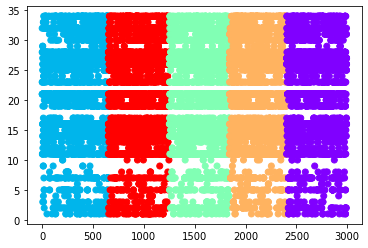

In [42]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.cluster_centers_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

clusters = kmeans.fit_predict(X)

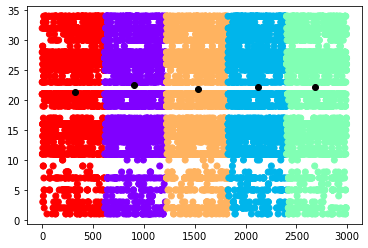

In [43]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [44]:
import json
from urllib.request import urlopen, Request

requestCategories = Request('https://romainpiot.fr/bigdata/categories.json', headers={'User-Agent': 'Mozilla/5.0'})
requestCustomers = Request('https://romainpiot.fr/bigdata/customers.json', headers={'User-Agent': 'Mozilla/5.0'})
requestProducts = Request('https://romainpiot.fr/bigdata/products.json', headers={'User-Agent': 'Mozilla/5.0'})

categoriesData = json.loads(urlopen(requestCategories).read())
customersData = json.loads(urlopen(requestCustomers).read())
productsData = json.loads(urlopen(requestProducts).read())

JSONDecodeError: Expecting value: line 188359 column 18 (char 5619712)

In [ ]:
def recommendItem(cli_id):
    tmp = customersData[cli_id]
    print (tmp)

recommendItem("71891681")